## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**
---
1.   Loading the dataset through google drive.
2.   Displaying first five rows.
3.   Cleaning the Data by checking any missing or duplicate values.
4.   Sorting needed values in order.
5.   Creating sub-data if needed.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#         DATA OVERVIEW
# Loading the dataset using pandas
crop_recommendation_df = pd.read_csv("/content/drive/MyDrive/Crop_recommendation.csv")

print("\t\t\t\033[1mDATA PREPROCESSING\033[0m\n\n")
print("\t\t\t\033[1mDATASET OVERVIEW:\033[0m\n")

# Previewing the first 5 rows of the dataset
print("\033[4mFIRST 5 ROWS OF THE DATASET\033[0m")
print(crop_recommendation_df.head())
print()

# Identifying the number of rows and columns
rows, columns = crop_recommendation_df.shape
print(f"\n\033[4mTHE NUMBER OF ROWS AND COLUMNS\033[0m \nRows: \033[1m{rows}\033[0m \nColumns: \033[1m{columns}\033[0m")
print()

# Listing all columns with their data types
print("\nCOLUMN\t\tDATATYPE")
print("-----------------------")
print(crop_recommendation_df.dtypes)
print()


#       FINDING MISSING VALUES
# Checking for any missing values in the dataset
missing_values = crop_recommendation_df.isnull().sum()

# Displaying the total count of missing values for each column
print("\n     \033[1mMISSING VALUE:\033[0m")
print("\nCOLUMN \t  MISSING COUNT")
print("-----------------------")
print(missing_values)
print()

#       CHECKING FOR DUPLICATE ROWS
print(f"\n\033[4mNUMBER OF DUPLICATE ROWS\033[0m -> {crop_recommendation_df.duplicated().sum()}")
print("\n\033[1mCleaned dataset saved successfully.\033[0m\n")


#       CREATING, SORTING AND FILTERING SUB-SET FOR ONLY FRUITS
# List of crops (vegtable) to remove
excluded_crops = [
    "rice", "maize", "jute", "cotton", "lentil", "blackgram", "mungbean",
    "mothbeans", "pigeonpeas", "kidneybeans", "chickpea", "coffee"
]

# Creating sub-data of only fruit crops
fruit_recommendation_df = crop_recommendation_df[~crop_recommendation_df['crops'].isin(excluded_crops)]

# Sorting the Target variable in alphabetic order
fruit_recommendation_df = fruit_recommendation_df.sort_values(by="crops")

# Saving the new dataset
fruit_recommendation_df.to_csv("/content/drive/MyDrive/Fruit_Recommendation_Dataset.csv", index=False)

# Displaying the first 5 filtered and sorted sub-dataset
print("\n\t\t\t\033[1mFILTERING AND SORTING\033[0m\n")
print("\033[4mFIRST 5 ROWS OF FILTERED AND SORTED SUB-DATASET:\033[0m")
print(fruit_recommendation_df.head())

			DATA PREPROCESSING


			DATASET OVERVIEW:

FIRST 5 ROWS OF THE DATASET
    N   P   K  temperature   humidity        ph    rainfall crops
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


THE NUMBER OF ROWS AND COLUMNS 
Rows: 2200 
Columns: 8


COLUMN		DATATYPE
-----------------------
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crops           object
dtype: object


     MISSING VALUE:

COLUMN 	  MISSING COUNT
-----------------------
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crops          0
dtype: int64


NUMBER OF 

# **Data Visualaisation**

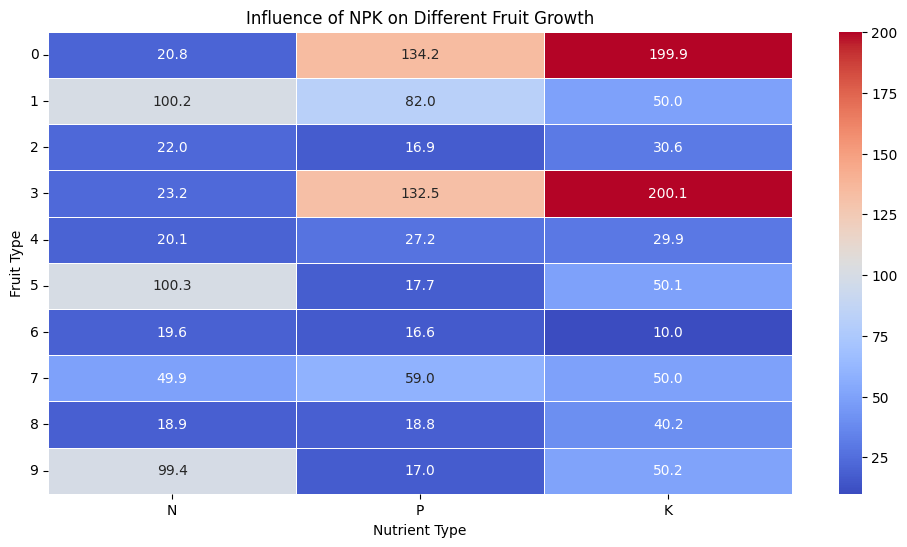

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by crop and calculate average N, P, K levels
npk_avg = fruit_recommendation_df.groupby("crops")[["N", "P", "K"]].mean()

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(npk_avg, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f")

plt.title("Influence of NPK on Different Fruit Growth")
plt.xlabel("Nutrient Type")
plt.ylabel("Fruit Type")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


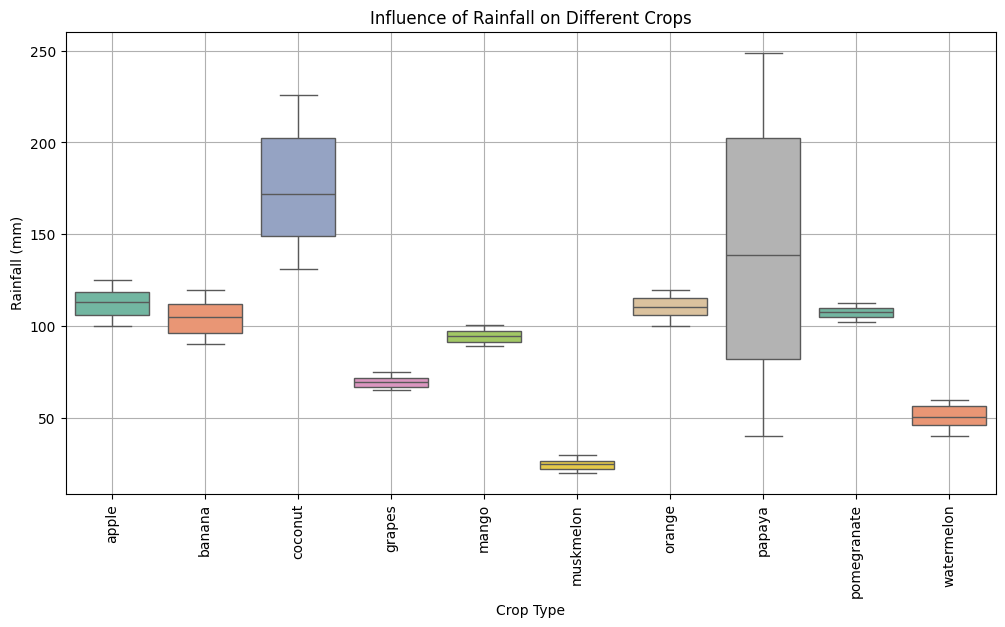

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="crops", y="rainfall", data=fruit_recommendation_df, hue="crops", palette="Set2")
plt.xticks(rotation=90)
plt.title("Influence of Rainfall on Different Crops")
plt.xlabel("Crop Type")
plt.ylabel("Rainfall (mm)")
plt.grid()
plt.show()


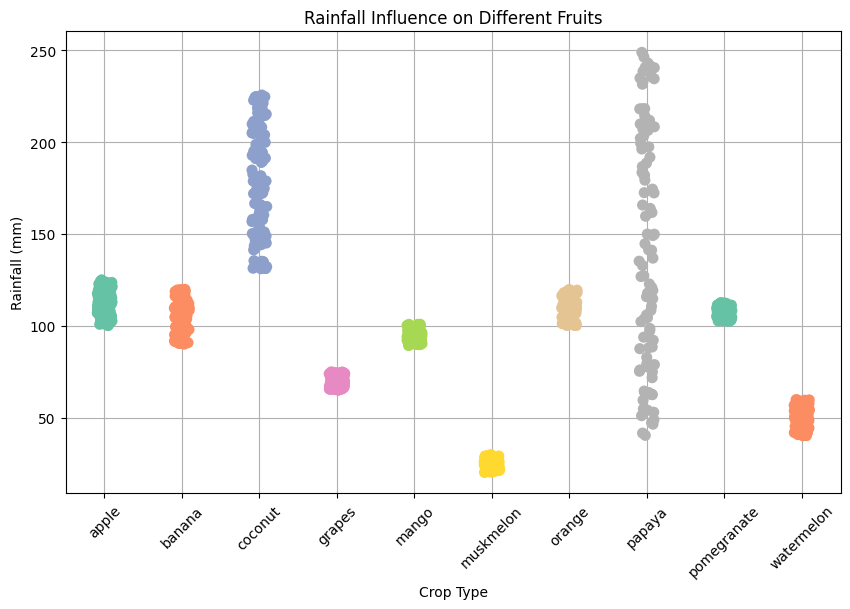

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=fruit_recommendation_df,
    x='crops',
    y='rainfall',
    jitter=True,
    size=8,
    hue='crops',  # Assigning the x variable as hue
    palette="Set2",
    legend=False  # Disabling legend to avoid duplication
)
plt.title('Rainfall Influence on Different Fruits')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(True)  # Enable grid
plt.show()


# **Splitting Dataset into Training and Testing Sets**


**Preparing data and varibales for Training and Testing**

In [ ]:
import numpy as np
import pandas as pd

# Defining features (independent variables) and target (dependent variable)
features = [
    "N",
    "P",
    "K",
    "temperature",
    "humidity",
    "ph",
    "rainfall"
]
target = 'crops'


# Set the correct order for the categories
fruit_recommendation_df[target] = pd.Categorical(fruit_recommendation_df[target],
                                                 categories=['apple', 'banana', 'coconut', 'grapes', 'mango', 'muskmelon', 'orange', 'papaya', 'pomegranate', 'watermelon'],
                                                 ordered=True)

# Convert categorical target variable into numerical labels (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
fruit_recommendation_df[target] = fruit_recommendation_df[target].cat.codes

# Verify the encoding
print("\033[1m\033[4mENCODING FOR CROPS\033[0m")
print("\033[1mUnique target values:\033[0m", fruit_recommendation_df[target].unique())

# Prepare the feature matrix X (independent variables)
X = fruit_recommendation_df[features].values

# Prepare the target variable y (dependent variable with integer labels)
y = fruit_recommendation_df[target].values

print("\033[1mUnique target values in y:\033[0m", np.unique(y))
# Verify the shapes of X and y
print()
print("\033[1mShape of X:\033[0m", X.shape)
print("\033[1mShape of y:\033[0m", y.shape)


ENCODING FOR CROPS
Unique target values: [0 1 2 3 4 5 6 7 8 9]
Unique target values in y: [0 1 2 3 4 5 6 7 8 9]

Shape of X: (1000, 7)
Shape of y: (1000,)


**Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Building Logistic Regression for Classification dataset from Scratch**

**One-Hot Encoding, Bias Addition, and Weight Initialization for Multiclass Classification**

In [ ]:
# One-hot encoding function
def one_hot_encode(y, num_classes):
    y = np.array(y).flatten()  # Ensure it's a 1D integer array
    m = len(y)
    y_encoded = np.zeros((m, num_classes))
    for i in range(m):
        y_encoded[i, int(y[i])] = 1  # Convert class index to integer
    return y_encoded

# Define number of classes
num_classes = len(np.unique(y))  # Should be 10

# One-hot encode the target labels
y_train_onehot = one_hot_encode(y_train, num_classes)
y_test_onehot = one_hot_encode(y_test, num_classes)

# Add bias term manually (prepend column of ones)
X_train_b = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_b = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights (small random values for better training)
W_trained = np.random.randn(X_train_b.shape[1], num_classes) * 0.01  # Small random values

# Print shapes to verify
print("\033[1mTraining Set Shape:\033[0m")
print(f"X_train_b shape: {X_train_b.shape}, y_train_onehot shape: {y_train_onehot.shape}")

print("\n\033[1mTesting Set Shape:\033[0m")
print(f"X_test_b shape: {X_test_b.shape}, y_test_onehot shape: {y_test_onehot.shape}")

print(f"\n\033[1mInitial Weights (W) Shape\033[0m: {W_trained.shape}")

Training Set Shape:
X_train_b shape: (700, 8), y_train_onehot shape: (700, 10)

Testing Set Shape:
X_test_b shape: (300, 8), y_test_onehot shape: (300, 10)

Initial Weights (W) Shape: (8, 10)


**Softmax For Multi-class Classification**

In [ ]:
def softmax(z):
    """Softmax activation function for multiclass classification"""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

**Cross-entropy loss (Cost function)**

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """Cross-entropy loss function for multiclass classification"""
    m = y_true.shape[0]  # Number of samples
    log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
    loss = np.sum(log_likelihood) / m
    return loss

**Gradient Descent Calculation**

In [ ]:
def gradient_descent(X, y, W, alpha, iterations):
    m = X.shape[0]  # Number of training samples
    cost_history = []
    epsilon = 1e-10  # A small value to avoid log(0)

    for i in range(iterations):
        # Forward pass: Compute predicted probabilities using the softmax function
        z = np.dot(X, W)  # Linear combination
        y_pred = softmax(z)  # Softmax to get probabilities

        # Add epsilon to y_pred to avoid log(0)
        log_likelihood = -np.log(y_pred[range(m), np.argmax(y, axis=1)] + epsilon)

        # Compute the cost function (cross-entropy loss)
        cost = np.sum(log_likelihood) / m
        cost_history.append(cost)

        # Backward pass: Compute the gradient of the cost function w.r.t weights (W)
        grad = np.dot(X.T, (y_pred - y)) / m  # Gradient of the cost function

        # Update the weights using the gradient descent rule
        W -= alpha * grad

    return W, cost_history

In [ ]:
# Initialize weights (W) and learning rate (alpha)
num_features = X_train.shape[1]  # Number of features
num_classes = len(np.unique(y_train))  # Number of unique classes

W_initial = np.zeros((num_features, num_classes))  # Initialize weights to zero
alpha = 0.01  # Learning rate
iterations = 10000  # Number of iterations

# Train the logistic regression model using gradient descent
W_trained, cost_history = gradient_descent(X_train, y_train_onehot, W_initial, alpha, iterations)

In [ ]:
def predict(X, W):
    """Predict class probabilities for the given feature matrix X"""
    z = np.dot(X, W)
    y_pred = softmax(z)
    return y_pred

# Predict on the training and test sets
y_train_pred = predict(X_train, W_trained)
y_test_pred = predict(X_test, W_trained)

# Convert predicted probabilities to class labels (argmax)
y_train_pred_labels = np.argmax(y_train_pred, axis=1)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Use the actual integer labels for comparison
y_train_labels = y_train  # No need for np.argmax, since y_train is already integer encoded
y_test_labels = y_test  # Same for y_test

**Calculating the confusion matrix**

In [ ]:
def confusion_matrix(y_true, y_pred, num_classes):
    """Calculate the confusion matrix from scratch"""
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1

    return matrix

**Calculating accuracy, precision, recall, and F1 score from the confusion matrix**

In [ ]:
def calculate_metrics(conf_matrix):
    """Calculate accuracy, precision, recall, and F1 score from the confusion matrix"""
    num_classes = conf_matrix.shape[0]

    # Calculate Accuracy
    accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

    # Initialize precision, recall, and F1 score lists
    precision = []
    recall = []
    f1_scores = []

    # Calculate precision, recall, and F1 score for each class
    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = np.sum(conf_matrix[:, i]) - TP
        FN = np.sum(conf_matrix[i, :]) - TP
        TN = np.sum(conf_matrix) - (TP + FP + FN)

        # Precision, Recall, F1 Score for class i
        class_precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        class_recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall) if (class_precision + class_recall) != 0 else 0

        precision.append(class_precision)
        recall.append(class_recall)
        f1_scores.append(class_f1)

    return accuracy, precision, recall, f1_scores

**Comparing values from training and testing sets**

In [ ]:
# Get confusion matrix for train and test sets
train_conf_matrix = confusion_matrix(y_train_labels, y_train_pred_labels, num_classes)
test_conf_matrix = confusion_matrix(y_test_labels, y_test_pred_labels, num_classes)

# Calculate metrics for train set
train_accuracy, train_precision, train_recall, train_f1_scores = calculate_metrics(train_conf_matrix)

# Calculate metrics for test set
test_accuracy, test_precision, test_recall, test_f1_scores = calculate_metrics(test_conf_matrix)

# Display the results
print("\n\033[1mTRAINING PERFORMANCE\033[0m")
print("-------------------------------------------------------------------------")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Scores: {train_f1_scores}")
print("-------------------------------------------------------------------------\n")

print("\033[1mTESTING PERFORMANCE\033[0m")
print("--------------------------------------------------------------------------------------------------")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Scores: {test_f1_scores}")
print("--------------------------------------------------------------------------------------------------\n")


TRAINING PERFORMANCE
-------------------------------------------------------------------------
Training Accuracy: 100.00%
Training Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Training Recall: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Training F1 Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
-------------------------------------------------------------------------

TESTING PERFORMANCE
--------------------------------------------------------------------------------------------------
Test Accuracy: 99.67%
Test Precision: [1.0, 1.0, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test Recall: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9565217391304348, 1.0, 1.0]
Test F1 Scores: [1.0, 1.0, 0.9866666666666666, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0]
--------------------------------------------------------------------------------------------------



**Comparing the testing and training's actual and predicted values**

In [ ]:
# Class labels mapping based on your encoding
class_labels_mapping = {
    0: 'apple',
    1: 'banana',
    2: 'coconut',
    3: 'grapes',
    4: 'mango',
    5: 'muskmelon',
    6: 'orange',
    7: 'papaya',
    8: 'pomegranate',
    9: 'watermelon'
}
# Print meaning of 0, 1, 2, 3
print("\033[1mClass Label Meanings:\033[0m")
print("---------------------")
for label, meaning in class_labels_mapping.items():
    print(f"{label}: {meaning}")

print()
# Print first 10 actual vs predicted values for training set
print("\n\033[1mTraining Set Predictions (first 10 rows):\033[0m")
print("------------------------------------")
for actual, predicted in zip(y_train_labels[:10], y_train_pred_labels[:10]):
    print(f"Actual: {actual} ->\t\tPredicted: {predicted}")
print("------------------------------------\n")

# Check class distribution
print("\033[1mClass distribution in y_train:\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print()

# Print first 10 actual vs predicted values for test set
print("\n\033[1mTest Set Predictions (first 10 rows):\033[0m")
print("------------------------------------")
for actual, predicted in zip(y_test_labels[:10], y_test_pred_labels[:10]):
    print(f"Actual: {actual} ->\t\tPredicted: {predicted}")
print("------------------------------------\n")

# Check class distribution
print("\033[1mClass distribution in y_test:\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

Class Label Meanings:
---------------------
0: apple
1: banana
2: coconut
3: grapes
4: mango
5: muskmelon
6: orange
7: papaya
8: pomegranate
9: watermelon


Training Set Predictions (first 10 rows):
------------------------------------
Actual: 5 ->		Predicted: 5
Actual: 4 ->		Predicted: 4
Actual: 4 ->		Predicted: 4
Actual: 4 ->		Predicted: 4
Actual: 7 ->		Predicted: 7
Actual: 9 ->		Predicted: 9
Actual: 3 ->		Predicted: 3
Actual: 5 ->		Predicted: 5
Actual: 9 ->		Predicted: 9
Actual: 5 ->		Predicted: 5
------------------------------------

Class distribution in y_train:
{0: 65, 1: 80, 2: 63, 3: 66, 4: 76, 5: 67, 6: 70, 7: 77, 8: 71, 9: 65}


Test Set Predictions (first 10 rows):
------------------------------------
Actual: 5 ->		Predicted: 5
Actual: 7 ->		Predicted: 7
Actual: 7 ->		Predicted: 7
Actual: 6 ->		Predicted: 6
Actual: 4 ->		Predicted: 4
Actual: 6 ->		Predicted: 6
Actual: 6 ->		Predicted: 6
Actual: 5 ->		Predicted: 5
Actual: 8 ->		Predicted: 8
Actual: 1 ->		Predicted: 1
-------

# **Building Primary models for Classification using SciKit Learn**

# **Decision Tree**



**Step 1: BUILD MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
dt_y_pred = dt_model.predict(X_test)

**Step 2: EVALUTE THE MODEL WITH**

1.   Accuracy
2.   Classification Report containing

  *   Precision
  *   Recall
  *   f1-score
  *   support





In [ ]:
# Evaluate the model
# Evaluate the model
print("\n\t  \033[1mDecision Tree Classifier Performance\033[0m")
print("---------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))

print("---------------------------------------------------------\n")




	  Decision Tree Classifier Performance
---------------------------------------------------------
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        24
           5       1.00      0.94      0.97        33
           6       1.00      1.00      1.00        30
           7       1.00      0.96      0.98        23
           8       1.00      1.00      1.00        29
           9       0.95      1.00      0.97        35

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

---------------------------------------------------------



Comparing the testing and training's actual and prediction values (y)

In [ ]:
class_labels_mapping = {
    0: 'apple',
    1: 'banana',
    2: 'coconut',
    3: 'grapes',
    4: 'mango',
    5: 'muskmelon',
    6: 'orange',
    7: 'papaya',
    8: 'pomegranate',
    9: 'watermelon'
}

# Decision Tree - Training Set Predictions (first 10 rows)
print("\n\033[1mDecision Tree - Training Set Predictions (first 10 rows):\033[0m")
print("---------------------------------------------------------")
for actual, predicted in zip(y_train[:10], dt_model.predict(X_train)[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("---------------------------------------------------------")

# Class distribution in training set for Decision Tree
print("\n\033[1mClass distribution in y_train (Decision Tree):\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print()

# Decision Tree - Test Set Predictions (first 10 rows)
print("\n\033[1mDecision Tree - Test Set Predictions (first 10 rows):\033[0m")
print("---------------------------------------------------------")
for actual, predicted in zip(y_test[:10], dt_y_pred[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("---------------------------------------------------------")

# Class distribution in test set for Decision Tree
print("\n\033[1mClass distribution in y_test (Decision Tree):\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))



Decision Tree - Training Set Predictions (first 10 rows):
---------------------------------------------------------
Actual: muskmelon-> 		Predicted: muskmelon
Actual: mango-> 		Predicted: mango
Actual: mango-> 		Predicted: mango
Actual: mango-> 		Predicted: mango
Actual: papaya-> 		Predicted: papaya
Actual: watermelon-> 		Predicted: watermelon
Actual: grapes-> 		Predicted: grapes
Actual: muskmelon-> 		Predicted: muskmelon
Actual: watermelon-> 		Predicted: watermelon
Actual: muskmelon-> 		Predicted: muskmelon
---------------------------------------------------------

Class distribution in y_train (Decision Tree):
{0: 65, 1: 80, 2: 63, 3: 66, 4: 76, 5: 67, 6: 70, 7: 77, 8: 71, 9: 65}


Decision Tree - Test Set Predictions (first 10 rows):
---------------------------------------------------------
Actual: muskmelon-> 		Predicted: muskmelon
Actual: papaya-> 		Predicted: papaya
Actual: papaya-> 		Predicted: papaya
Actual: orange-> 		Predicted: orange
Actual: mango-> 		Predicted: mango
Actua

**Step 3: Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# HYPER PARAMTER OPTIMIZATION WITH CROSS_VALIDATION
# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the random search
random_search_dt.fit(X_train, y_train)

# Find the best hyperparameters
print("Best Hyperparameters for Decision Tree:", random_search_dt.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}


**Step 4: Feature Selection**

In [ ]:
# FEATURE SELECTION
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Standardizing the features (recommended for mutual information)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply mutual information for feature selection
mi_scores = mutual_info_classif(X_scaled, y, discrete_features=False)

# Create a DataFrame to display feature importance
mi_scores_df = pd.DataFrame({'Feature': features, 'Mutual Information Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information Score", ascending=False)

# Display top features
print("\n\033[1mTop Features based on Mutual Information:\033[0m")
print(mi_scores_df)


Top Features based on Mutual Information:
       Feature  Mutual Information Score
6     rainfall                  1.563317
2            K                  1.405166
1            P                  1.165160
4     humidity                  1.152027
3  temperature                  1.012077
0            N                  0.764817
5           ph                  0.584391


In [ ]:
# Selecting the top features based on MI scores
selected_features = [
    'rainfall', 'K', 'P',
]
# 'N', 'humidity', 'ph', 'temperature'

# Prepare the feature matrix with selected features
X_selected = fruit_recommendation_df[selected_features].values

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

**Step 5: Final Model with selected Features and best Hyperparameters**
### Final Decision Tree Model


In [ ]:
# Training the Final Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='entropy', max_depth=40, max_features=None,
    min_samples_split=2, min_samples_leaf=1, random_state=42
)
dt_model.fit(X_train, y_train)  # Fit the model with the training data

# Testing the Decision Tree Model
y_pred_dt = dt_model.predict(X_test)  # Predict on the test data

# Evaluating the Decision Tree Model
print("\n\t  \033[1mDecision Tree Final Model Results:\033[0m")
print("---------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))  # Accuracy score on test set
print("Classification Report:\n", classification_report(y_test, y_pred_dt))  # Detailed metrics
print("----------------------------------------------------------\n")

# Print first 10 actual vs predicted values for training set
print("\n\033[1mDecision Tree - Training Set Predictions (first 10 rows):\033[0m")
print("---------------------------------------------------------")
for actual, predicted in zip(y_train[:10], dt_model.predict(X_train)[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("---------------------------------------------------------")

# Check class distribution in training set
print("\n\033[1mClass distribution in y_train (Decision Tree):\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print()


# Print first 10 actual vs predicted values for test set
print("\n\033[1mDecision Tree - Test Set Predictions (first 10 rows):\033[0m")
print("---------------------------------------------------------")
for actual, predicted in zip(y_test[:10], y_pred_dt[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("---------------------------------------------------------")

# Check class distribution in test set
print("\n\033[1mClass distribution in y_test (Decision Tree):\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))



	  Decision Tree Final Model Results:
---------------------------------------------------------
Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        21
           4       1.00      0.80      0.89        15
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        13
           8       0.88      1.00      0.94        23
           9       1.00      1.00      1.00        21

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

----------------------------------------------------------


Decision Tree - Training Set Predictions (f

# **SVC Model**


**Step 1: Build Models**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize Support Vector Classifier (svc)
svc_model = SVC(random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Predict on test data
svc_y_pred = svc_model.predict(X_test)

**Step 2: Evaluate the Models with:**

1.   Accuracy
2.   Classification Report containing

  *   Precision
  *   Recall
  *   f1-score
  *   support





In [ ]:
# Evaluate the model
print("\n\033[1mSVC Classifier Performance:\033[0m")
print("---------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, svc_y_pred))
print("Classification Report:\n", classification_report(y_test, svc_y_pred))
print("---------------------------------------------------------\n")



SVC Classifier Performance:
---------------------------------------------------------
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

---------------------------------------------------------



Comparing the testing and training's actual and prediction values (y)

In [ ]:
class_labels_mapping = {
    0: 'apple',
    1: 'banana',
    2: 'coconut',
    3: 'grapes',
    4: 'mango',
    5: 'muskmelon',
    6: 'orange',
    7: 'papaya',
    8: 'pomegranate',
    9: 'watermelon'
}

# SVC - Training Set Predictions (first 10 rows)
print("\n\t\033[1mSVC - Training Set Predictions (first 10 rows):\033[0m")
print("--------------------------------------------------------------")
for actual, predicted in zip(y_train[:10], svc_model.predict(X_train)[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("--------------------------------------------------------------\n")

# Class distribution in training set for SVC
print("\033[1mClass distribution in y_train (SVC):\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

# SVC - Test Set Predictions (first 10 rows)
print("\n\t\033[1mSVC - Test Set Predictions (first 10 rows):\033[0m")
print("--------------------------------------------------------------")
for actual, predicted in zip(y_test[:10], svc_y_pred[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("--------------------------------------------------------------\n")

# Class distribution in test set for SVC
print("\033[1mClass distribution in y_test (SVC):\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))





	SVC - Training Set Predictions (first 10 rows):
--------------------------------------------------------------
Actual: apple-> 		Predicted: apple
Actual: muskmelon-> 		Predicted: muskmelon
Actual: orange-> 		Predicted: orange
Actual: muskmelon-> 		Predicted: muskmelon
Actual: pomegranate-> 		Predicted: pomegranate
Actual: muskmelon-> 		Predicted: muskmelon
Actual: banana-> 		Predicted: banana
Actual: watermelon-> 		Predicted: watermelon
Actual: mango-> 		Predicted: mango
Actual: pomegranate-> 		Predicted: pomegranate
--------------------------------------------------------------

Class distribution in y_train (SVC):
{0: 80, 1: 87, 2: 73, 3: 79, 4: 85, 5: 78, 6: 75, 7: 87, 8: 77, 9: 79}



	SVC - Test Set Predictions (first 10 rows):
--------------------------------------------------------------
Actual: muskmelon-> 		Predicted: muskmelon
Actual: papaya-> 		Predicted: papaya
Actual: papaya-> 		Predicted: papaya
Actual: orange-> 		Predicted: orange
Actual: mango-> 		Predicted: mango
Act

**Step 3: Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the model
svc = SVC()

# Define the hyperparameters to tune
param_dist_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 0.1, 0.5, 1],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': [None, 'balanced']
}

# Initialize RandomizedSearchCV
random_search_svc = RandomizedSearchCV(estimator=svc, param_distributions=param_dist_svc, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the random search
random_search_svc.fit(X_train, y_train)

# Find the best hyperparameters
print("Best Hyperparameters for svc:", random_search_svc.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for svc: {'tol': 0.001, 'shrinking': True, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0, 'class_weight': 'balanced', 'C': 100}


**Step 4: Feature Selection**

In [ ]:
# FEATURE SELECTION
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Standardizing the features (recommended for mutual information)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply mutual information for feature selection
mi_scores = mutual_info_classif(X_scaled, y, discrete_features=False)

# Create a DataFrame to display feature importance
mi_scores_df = pd.DataFrame({'Feature': features, 'Mutual Information Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information Score", ascending=False)

# Display top features
print("\n\033[1mTop Features based on Mutual Information:\033[0m")
print(mi_scores_df)


Top Features based on Mutual Information:
       Feature  Mutual Information Score
6     rainfall                  1.563317
2            K                  1.427431
1            P                  1.160067
4     humidity                  1.152027
3  temperature                  1.012077
0            N                  0.753105
5           ph                  0.584391


In [ ]:
# Selecting the top features based on MI scores
selected_features = [
    'rainfall', 'K', 'P'
]

# Prepare the feature matrix with selected features
X_selected = fruit_recommendation_df[selected_features].values

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

**Step 5: Final Model with selected Features and best Hyperparameters**
### Final SVC Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize svc Model
svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the svc model
svc_model.fit(X_train, y_train)  # Fit the model with the training data

# Predict on the test data
y_pred_svc = svc_model.predict(X_test)

# Evaluating the SVC Model
print("\n\t\t\033[1mSVC Final Model Results:\033[0m")
print("--------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))  # Accuracy score on test set
print("Classification Report:\n", classification_report(y_test, y_pred_svc))  # Detailed metrics
print("--------------------------------------------------------\n")

# Print first 10 actual vs predicted values for training set
print("\n\t\033[1mSVC - Training Set Predictions (first 10 rows):\033[0m")
print("--------------------------------------------------------")
for actual, predicted in zip(y_train[:10], svc_model.predict(X_train)[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("--------------------------------------------------------")

# Check class distribution in training set
print("\033[1mClass distribution in y_train (SVC):\033[0m")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
print()

# Print first 10 actual vs predicted values for test set
print("\n\t\033[1mSVC - Test Set Predictions (first 10 rows):\033[0m")
print("--------------------------------------------------------")
for actual, predicted in zip(y_test[:10], y_pred_svc[:10]):
    print(f"Actual: {class_labels_mapping[actual]}-> \t\tPredicted: {class_labels_mapping[predicted]}")
print("--------------------------------------------------------")

# Check class distribution in test set
print("\033[1mClass distribution in y_test (SVC):\033[0m")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))





		SVC Final Model Results:
--------------------------------------------------------
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------------


	SVC - Training Set Predictions (first 10 rows):
----------

**Conclusion**

1. Model Performance:

    --> The Decision Tree model has a high accuracy of 96.5% while the Naive Bayes model's accurcay reached 86%. This shows that the Decision Tree model performed better in accuracy and has a great recall for the Unhealthy class (3) but a low recall for the Very Healthy class (0) compared to Naive Bayes.

2. Impact of Methods:

    --> 'mutual_info_classif' method was used for feature selection which identified features like 'Fire Risk Index', 'Disturbance level', and 2 more are the features which influences the target variable more. The best hyperparameters for Decision Tree ('max_depth': 30, 'criterion': 'entropy', etc) brought minor changes to stability while the Naive Bayes ('var_smoothing': 2.06913808111479e-06) had an impact to the final model.


3. Insights and Future Directions:

    --> Many other models like Random Boosting and XGBoost could be explored for classification dataset for evene better result. There was a critical classs imbalance as underrepresented categories led to misclassifications.